<a href="https://colab.research.google.com/github/kboodlal/Machine_Learning_Blog_Code/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas
import random as rd
import seaborn as sns
import sys
import os
path = '/content/drive/My Drive/Colab Notebooks/'
W_H_G_data = os.path.join(path, 'weight-height.csv')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


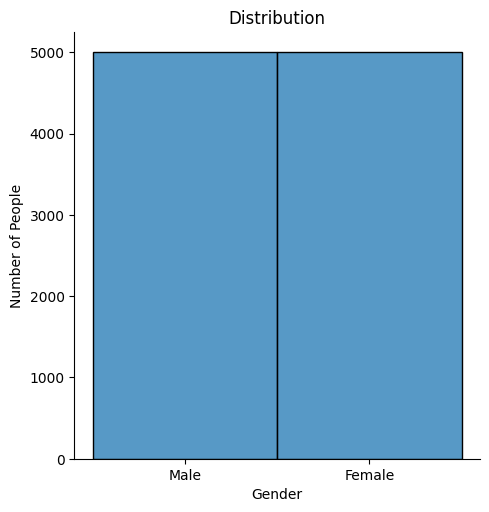

In [2]:
data = pandas.read_csv(W_H_G_data)
sns.displot(data=data['Gender']).set(title="Distribution", xlabel="Gender",
                                                ylabel="Number of People")



Text(0.5, 1.0, 'Weight and Height by Gender')

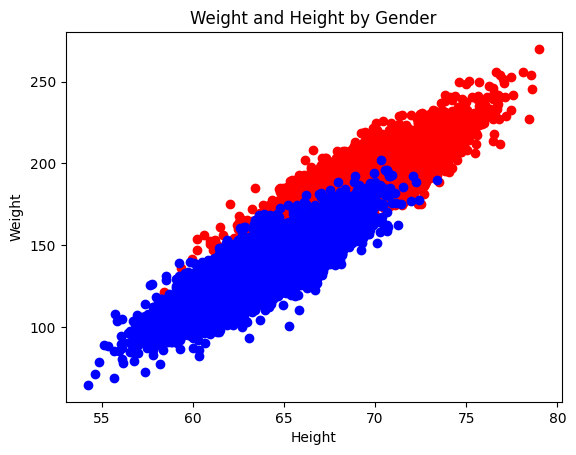

In [3]:
data_male = data[data['Gender'] == 'Male']
data_female = data[data['Gender'] == 'Female']
plt.scatter(data_male['Height'], data_male['Weight'], color='red')
plt.scatter(data_female['Height'], data_female['Weight'], color='blue')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Weight and Height by Gender')

In [4]:
data_set = data[['Height','Weight']]
K =2

# Select random observation as centroids
cent = (data_set.sample(n=K))
diff = 1
j=0

while(diff!=0):
    inter_data=data_set
    i=1
    for i1,r_c in cent.iterrows():
        diff_list=[]
        for i2,r_i in inter_data.iterrows():
            d=np.sqrt((r_c['Weight']-r_i['Weight'])**2 + (r_c['Height']-r_i['Height'])**2)
            diff_list.append(d)
        data_set[i] = diff_list
        i += 1

    pos_list=[]
    for index,row in data_set.iterrows():
        min_dist=row[1]
        pos=1
        for l in range(K):
            if row[l+1] < min_dist:
                min_dist = row[l+1]
                pos=l+1
        pos_list.append(pos)
    data_set['Cluster'] = pos_list
    new_cent = data_set.groupby(['Cluster']).mean()[['Weight','Height']]
    if j == 0:
        diff=1
        j += 1
    else:
        diff = (new_cent['Weight'] - cent['Weight']).sum() + (new_cent['Height'] - cent['Height']).sum()
    cent = data_set.groupby(['Cluster']).mean()[['Weight','Height']]


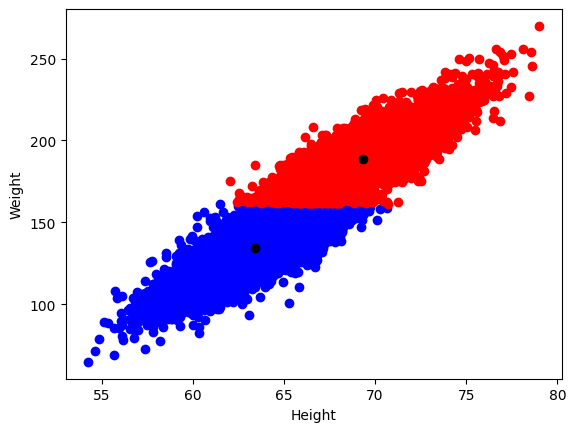

In [5]:
color=['blue','red']
for k in range(K):
    data=data_set[data_set['Cluster']==k+1]
    plt.scatter(data['Height'],data['Weight'],c=color[k])
plt.scatter(cent['Height'],cent['Weight'],c='black')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()